- 상관분석
    - 상관분석은 두 변수 간의 선형적 관계를 평가하는 통계적 기법, 한 변수의 변화가 다른 변수와 얼마나 관련이 있는 지 파악 가능
    - 상관계수(Correlation Coefficient)라는 값을 사용하여 관계의 강도와 방향을 나타냄
    - 상관분석은 데이터분석, 특히 탐색적 데이터 분석(EDA) 과정에서 중요한 단계, 변수 간의 관계를 이해하고 데이터를 요약하며 모델 설계의 기초자료로 활용

- 상관계수란?
    - 상관계수는 두 변수 간 선형적 관계의 강도와 방행을 수치적으로 표현
    - 상관계수의 범위: -1 <= r <= 1
        - r = +1: 두 변수 간 완벽한 양의 선형 관계 (한 변수가 증가하면 다른 변수도 증가)
        - r = 0: 두 변수 간 선형 관계가 없음
        - r = -1: 두 변수 간 완벽한 음의 선형 관계 (한 변수가 증가하면 다른 변수는 감소)
    - 상관계수의 해석
        - 0.0 <= |r| < 0.3 : 약한 상관관계 (Weak)
        - 0.3 <= |r| < 0.7 : 약한 상관관계 (Moderate)
        - 0.7 <= |r| < 1.0 : 강한 상관관계 (Strong)
    - 상관분석의 목적
        - 변수간 관계 탐색: 상관관계를 파악하여 데이터의 구조를 이해
        - 모델링에 유용한 변수 선택: 예측 모델에서 중요한 변수를 선택할 때 활용
        - 다중공선성 확인: 상관계수가 0.8 이상으로 높은 변수는 중복 정보를 가질 가능성이 높음
        - 데이터 이해: 데이터가 특정 패턴을 가지는 지 확인하여 분석 방향을 설정

- 상관 분석의 종류: 상관계쑤 계산 방식에는 다음과 같은 방법들이 있음
    - 피어슨 상관계수(Pearson Correlation)
        - 가장 널리 사용되는 방법
        - 두 변수간의 선형관계를 측정
        - 수식: 
        - 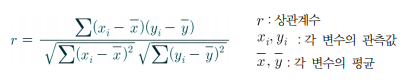
        
        - 조건: 데이터가 연속형이고, 정규 분포를 따른다고 가정
    - 스피어만 상관계수(Spearman Correlation)
        - 순위 기반 상관계쑤로, 두 변수 간의 비선형 관계도 측정 가능
        - 데이터를 순위(rank)로 변환한 후, 피어슨 상관계수를 계산
        - 수식:
        - 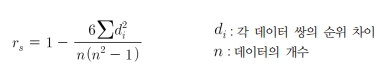
        - 조건: 비정규분포 데이터, 순위 데이터에도 사용 가능
    - 켄달의 타우 (Kendall's Tau)
        - 두 변수 간의 순서 관계를 비교
        - 두 변수의 값이 일관되게 증가하거나 감소하는지를 측정
        - 조건: 작은 데이터셋에 유리

- 상관분석의 한계
    - 인과관계와 상관관계의 혼동
        - 상관관계가 있다고 해서 하나의 변수가 다른 변수에 영향을 준다는 의미는 아님
            - ex> 아이스크림 판매량과 익사 사고는 상관관계가 높지만, 인과관계는 없음
        - 비선형 관계 탐지 불가 (피어슨)
            - 피어슨 상관계수는 비선형 관계를 탐지하지 못함
                - ex> y = x^2y = x^2 는 상관계수가 0일 수 있지만 강한 관계를 가짐
        - 결측치와 이상치의 영향
            - 결측치나 이상치가 상관계수 계산에 큰 영향을 미칠 수 있음

- heart.csv 데이터를 활용한 상관분석
    - 데이터 설명: heart.csv는 심장병과 관련된 데이터를 포함, 다음 주요 변수를 대상으로 상관관계 분석
        - 나이(age): 환자의 나이
        - 콜레스테롤(chol): 혈중 콜레스테롤 수치
        - 최대 심박수(thalach): 환자가 운동 중 도달한 최대 심박수
        - 심장병 여부(target): 심장병 유무(1: 있음, 0: 없음)

데이터 첫행 5개:
    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  

상관계수 행렬:
                age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trtbps    0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      

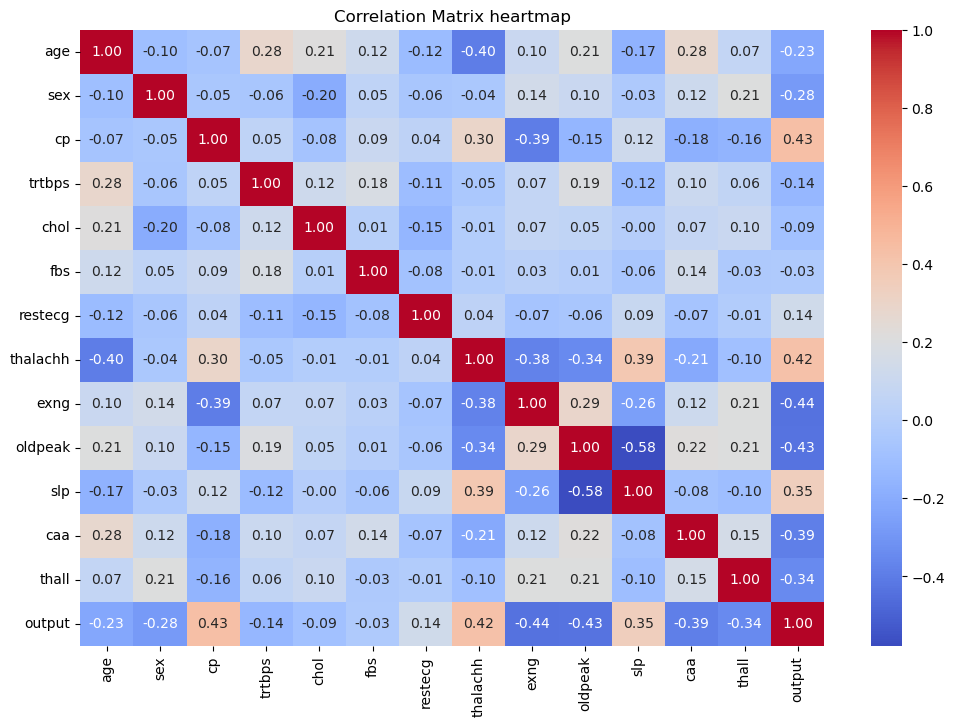

In [6]:
# pandas 와 seaborn 라이브러리 임포트
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# heart.csv 파일 열기
file_path = "datasets/heart.csv"
df = pd.read_csv(file_path)

# 데이터 확인
print("데이터 첫행 5개:\n", df.head())

# 상관계수 계산
correlation_matrix = df.corr(method="pearson")      # 피어슨 상관계수 계산
print("\n상관계수 행렬:\n", correlation_matrix)

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix heartmap")
plt.show()


- pandas와 시각화 라이브러리 임포트
    - import pandas as pd
    - import seaborn as sns
    - import matplotlib.pyplot as plt

        - pandas: 데이터를 읽고 분석할 수 있는 라이브러리, pd 라는 별칭으로 로드
        - seaborn: 데이터 시각화를 위한 라이브러리, 그래프 시각화
        - matplotlib.pyplot: 시각화 도구, 그래프와 히트맵 생성에 사용 

- csv파일 읽기
    - file_path = "datasets/heart.csv"  # 파일 경로 지정
    - df = pd.read_csv(file_path)
    - df.head()

        - file_path: CSV 파일의 경로를 지정 ex> "datasets/heart.csv"
        - pd.read_csv: Pandas를 이용해 CSV 파일을 데이터프레임으로 불러옴, 데이터프레임은 행(row)과 열(column)로 구성된 표 형태으 데이터
        - df.head(): 데이터프레임의 첫 5개 향을 출력하여 데이터가 어떻게 구성되어 있는지 확인


- 상관계수 계산
    - correlation_matrix = df.corr(method="pearson")
    - print("\n상관계수 행렬:\n", correlation_matrix)

        - df.corr() 함수: 각 열(변수) 간의 상관관계를 계산, 기본적으로 피어슨 상관계수(Pearson Correlation)를 계산
            - mathod="spearman"을 사용하면 스피어만 상관계수를 계산할 수 있음
        - 해석: 
            - age와 thalach: 상관계수 -0.398522로 음의 상관관계, 나이가 많을 수록 최대 심박수가 감소하는 경향
            - thalach와 target: 상관계수 0.421741로 양의 상관관계, 최대 심박수가 높을수록 심장병 가능성이 높음

- 상관계수 시각화(히트맵)
    - plt.figure(figsize=(12, 8))
    - sns.heartmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    - plt.title("Correlation Matrix heartmap")
    - plt.show()

        - plt.figure(figsize=(12, 8))
            - 역할: 그래프으 크기를 설정
            - figsize: 가로와 세로 크기를 튜플로 지정, (12, 8)는 그래프의 가로 크기12, 세로 크기, 8로 설정, 단위는 인치(inch)로 크기를 조정
        - sns.heartmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
            - 이 코드가 히트맵을 생성하여 상관계수를 시각적으로 보여줌
        - sns.heartmap
            - Seaborn 라이브러리의 함수로, 데이터의 상관관계나 행렬 정보를 색상으로 표현
        - correlation_matrix
            - 상관계수를 계산한 행렬 데이터를 입력
        - annot=True
            - 각 셀에 상관계수 값을 숫자로 표시, 그래프에 숫자가 없으면 상관계수를 확인하기 불편해 이 옵션 지정 필요
        - fmt=".2f"
            - 상관계수 숫자를 소수점 둘째자리까지 표시, ex> 0.213678 -> 0.21
        - cmpa="coolwarm"
            - 그래프의 색상 팔레드를 설정
        - "coolwarm"
            - 빨간색: 양의 상관관계 (상관계수 > 0)
            - 파란색: 음의 상관관계 (상관계수 < 0)
            - 색상이 진할수록 상관관계가 강하다는 뜻
        - cbar=True
            - 오른쪽에 생상 바(Color Bar)를 추가, 색상 바는 상관계수 값에 색상을 설명
        - plt.title("Correlation Matrix heartmap")
            - 히트맵의 제목을 설정
        - "Correlation Matrix heartmap": "상관 행렬 히트맵"이라는 제목을 지정
        - plt.show()
            - 그래프를 화면에 출력, plt.show()를 호출하지 않으면, 일부 환경에서는 그래프가 표시되지 않을 수 있음

    - 코드 전체 흐름
        - plt.figure로 그래프 크기 설정
        - sns.heartmap으로 상관계수를 히트맵 형태로 시각화
        - annor=True로 각 셀에 상관계수 숫자 표시
        - cmap="coolwarm"으로 색상 팔레트를 빨강/파랑으로 설정
        - plt.title로 제목 설정
        - plt.show()로 그래프 출력
    - 상관분석 결과 해석
        - 히트맵은 변수들 간의 상관관계를 시각적으로 표현하며, 각각의 값과 색상을 바탕으로 결과를 해석 가능, 히트맵에서 다음을 해석

- 상관계수의 의미
    - 상관계수 범위
        - 1.00: 완벽한 양의 상관관계 (빨간색, 두 변수가 같은 방향으로 강하게 연관됨)
        - 0.00: 상관관계 없음 (흰색 또는 옅은 색, 변수 간 연관 없음)
        - -1.00: 완벽한 음의 상관관계 (파란색, 두 변수가 반대 방향으로 강하게 연관)
    - 양의 상관관계 (+)
        - 두 변수가 같은 방향으로 증가하거나 감소 ex> cp와 output간 상관계수 = 0.43 (약한 양의 상관관계)
    - 음의 상관관계 (-)
        - 한 변수가 증가하면 다은 변수가 감소 ex> thalachh와 age 간 상관계수 = -0.40 (약한 음의 상관관계)

- 주요 상관관계 해석
    - cp와 output (상광계수: 0.43)
        - 가슴 통증 유형(cp)과 심장병 여부(output) 간에는 약한 양의 상관관계가 존재
        - 가슴 통증 유형이 특정 조건일 때 심장병 여부와 관련이 있을 가능성을 의미
    - thalachh와 output (상관계수: 0.42)
        - 최대 심박수(thalachh)가 높을 수록 심장병(output) 가능성이 높아지는 경행
        - 이는 최대 심박수가 심장병 여부를 예측하는 중요한 변수임을 시사
    - age와 thalachh (상관계수: -0.40)
        - 나이(age)가 증가할수록 최대 심박수(thalachh)가 감소하는 음의 상관관계
        - 이는 나이가 많아질수록 심박수가 낮아지는 일반적인 생리학적 경향을 반영
    - exng와 output (상관계수: -0.44)
        - 운동 유발 협심증(exng)과 심장병 여부(output) 간 음의 상관관계
        - 이는 운동 유발 협심증이 있을 때 심장병 가능성이 감소하는 것처럼 보이지만, 데이터 특성에 따라 다른 해석이 필요
    - oldpeak와 output (상관계수: -0.43)
        - ST 우울도(oldpeak)와 심장병 여부(output) 간에도 음의 상관관계가 있음
        - ST 우울도가 높을 수록 심장병 가능성이 낮아지는 경향이 있음

- 색상 해석
    - 빨간색 계열 (상관계수 > 0)
        - ex> cp와 output, thalachh와 output은 양으 상관관계를 나타냄, 양의 상관관계는 두 변수가 같은 방향으로 변한다는 것을 의미
    - 파란색 계열 (상관계수 < 0)
        - ex> age와 thalachh, oldpeak와 output은 음의 상관관계를 나타냄, 음의 상관관계는 한 변수가 증가하면 다른 변수가 감소한다는 것을 의미

- 활용 방안
    - 중요 변수 식별
        - 상관계수가 높거나 의미 있는 변수를 모델에 포함, ex> cp, thalachh 등
    - 모델 최적화
        - 상관관계가 강한 변수는 중요한 특징으로 활용, ex> thalachh와 output은 상관계수가 0.42로, 예측 변수로 유용
    - 다중공선성 제거
        - 상관계수가 0.8 이상인 변수는 중복된 정보를 가질 가능성이 높으므로 하나를 제거하거나 차원 축소(PCA 등) 방법을 사용할 수 있음

- 교차분석
    - 교차분석이란?
        - 교차분석은 두 개 이상의 범주형 변수 간의 관계를 분석하는 방법, 주로 범주형 데이터에서 변수 간의 빈도 분포를 비교하거나, 변수 간의 상호 연관성을 파알할 때 사용
        - 데이터를 행(orw)과 열(column)로 나누어 교차표(Contingency Table) 형태로 표현
    - 교차분석의 목적
        - 변수 간 관계 탐색
            - 두 범주형 변수 간의 상관성이나 연관성을 파악, ex> 성별과 심장병 여부 간의 관계
        - 빈도 분석
            - 변수별로 특정 그룹에서 데이터가 얼마나 자주 나타나는지 확인, ex> 특정 연령대에서 심장벼우 여부의 빈도 비교
        - 시각적 비교
            - 막대 그래프나 히트맵으로 데이터를 시각적으로 표현하여 해석을 도움

- 교차표 (Contingency Table)
    - 교차분석의 결과는 교차표로 나타냄, 교차표는 두 변수 간의 빈도 분포를 보여주는 표로 한 변수는 행, 다른 변수는 열로 배치
    - ex> sex(성별)과 target(심장병 여부) 간의 교차표

| | target | target |
|--|--|--|
| sex | 0 | 1 |
| 0 | 25 | 72 |
| 1 | 45 | 120 |

- 성별(sex)이 여성(0)일 때 심장병이 없는 경우(0)는 25명, 심장병이 있는 경우(1) 72명
- 성별(sex)이 남성(1)일 때 심방병이 없는 경우(0)는 45명, 심장병이 있는 경우(1) 120명

 - 교차표(Contingency Table)의 주요지표
    - 빈도(Frequency): 교차표의 기본 값으로, 각 변수 조합의 발생 횟수
    - 행 비율(Row Percentage): 특정 행의 비율을 계산
        - ex> 성별별 심장병 여부의 비율
    - 열 비율(Column Percentage): 특정 열의 비율을 계산
        - ex> 심방병 여부별 성별 분포
    - 전체 비율(Total Percentage): 전체 데이터에서 해당 조합이 차지하는 비율

In [7]:
import pandas as pd                 # pandas 라이브러리 임포트

file_path = "datasets/heart.csv"    # 파일 경로
df = pd.read_csv(file_path)
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# 교차표 생성
crosstab = pd.crosstab(df["sex"], df["output"])

# 교차표 출력
print("교차표(빈도):\n")
crosstab

교차표(빈도):



output,0,1
sex,,
0,24,72
1,114,93


- pd.crosstab: 교차표를 생성하는 Pandas 함수, 두 개 이상의 범주형 변수와 빈도를 교차표 형태로 요약
- df["sex"]: sex 열은 행(row)으로 지정, 범주형 데이터로 0(여성)과 1(남성) 값을 가짐
- df["output"]: output 열은 열(Column)로 지정, 범주형 데이터로 0(심장병 없음)과 1(심장병 있음) 값을 가짐
- crosstab: 결과는 데이터프레임 형태으 교차표

In [9]:
# 행 기준 비율 계산
row_percentage = pd.crosstab(df["sex"], df["output"], normalize="index") * 100
print("\n행 기준 비율:\n")
row_percentage


행 기준 비율:



output,0,1
sex,,
0,25.000000,75.000000
1,55.072464,44.927536


- normalize="index", 각 행(Row)을 기준으로 비율 계산, 각 행의 합이 1 또는 100%가 되도록 계산
- *100: 비율을 퍼센트(%)로 변환
- 결과해석, 여성(sex=0) 중 심장병이 있는 경우(1)의 비율: 75.00%, 남성(sex=1) 중 심장병이 있는 경우(1)의 비율: 44.93%

In [10]:
# 교차표 비율계산, 열 기준 비율 계산
col_percentage = pd.crosstab(df["sex"], df["output"], normalize="columns") * 100
print("\n열 기준 비율:\n")
col_percentage


열 기준 비율:



output,0,1
sex,,
0,17.391304,43.636364
1,82.608696,56.363636


- normalize="columns", 각 열(Column)을 기준으로 비율 계산, 각 열의 합이 1 또는 100%가 되도록 계산
- 결과해석, 심장병이 없는 경우(0) 중 여성(sex=0)의 비율: 17.39%, 심장병이 있는 경우(1) 중 남성(sex=1)의 비율: 56.36%

In [11]:
# 교차표 비율계산, 전체 비율
total_percentage = pd.crosstab(df["sex"], df["output"], normalize=True) * 100
print("\n전체 기준 비율:\n")
total_percentage


전체 기준 비율:



output,0,1
sex,,
0,7.920792,23.762376
1,37.623762,30.693069


- normalize=True, 전체 데이터를 기준으로 비율 계산, 모든 값의 합이 1 또는 100%가 되도록 계산
- 결과해석:
    - 전체 데이터 중 여성(sex=0)이면서 심장병이 없는 경우(0)의 비율: 7.92%
    - 전체 데이터 중 남성(sex=1)이면서 심장병이 있는 경우(1)의 비율: 30.69%

In [20]:
# 교차표 비율계산: 전체 비율(소수점 자리, 합계 표시 옵션 추가)
# 전체 기준 비율 계싼 및 합계 포함
total_percentage_with_totals = pd.crosstab(df["sex"], df["output"], normalize=True, margins=True) * 100
total_percentage_with_totals = total_percentage_with_totals.round(2)
print("\n전체 기준 비율 (합계 포함):\n")
total_percentage_with_totals


전체 기준 비율 (합계 포함):



output,0,1,All
sex,,,
0,7.92,23.76,31.68
1,37.62,30.69,68.32
All,45.54,54.46,100.00


- round(2): 
    - 소수점 둘째 자리까지 반올림, 계산된 비율으 보기 좋게 정리하여, 출력 시 가독성을 높임
    - 예시 변환: 계산된 값이 27.45678인 경우, 소수점 둘째 자리까지 표시: 27.46
- All
    - 행/열의 합계를 계산하여 추가, 성별 0(여성)은 전체 31.68%를 차지, 심장병이 있는 경우(output=1)는 전체의 54.46%를 차지  

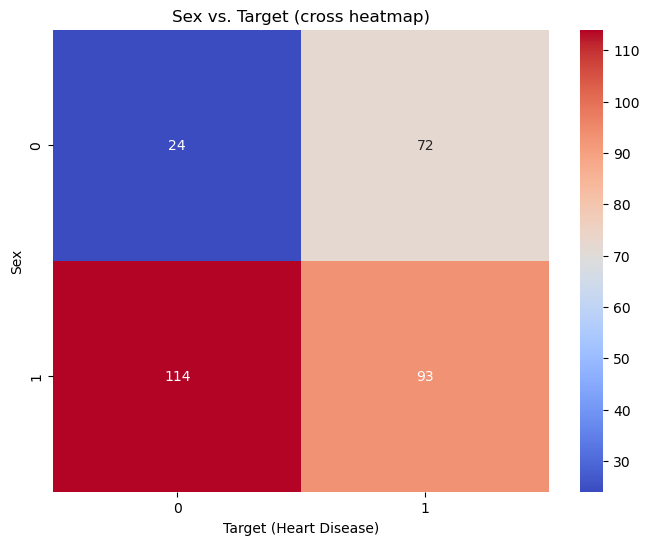

In [21]:
# 교차분석 시각화

import seaborn as sns
import matplotlib.pylab as plt

# 교차표를 히트맵으로 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="coolwarm", cbar=True)
plt.title("Sex vs. Target (cross heatmap)")
plt.xlabel("Target (Heart Disease)")
plt.ylabel("Sex")
plt.show()

- plt.figure(figsize=(8, 6))
    - 그래프의 크기를 가로 8인치, 세로 6인치로 설정
- sns.heartmap
    - 교차표를 색상으로 시각화
    - annot=True: 셀에 숫자(빈도)를 표시
    - fmt="d": 숫자를 정수 형태로 표시
    - cmap="coolwarm": 색상 팔레트 설정 (빨간색: 높은 값, 파란색: 낮은 값)
- plt.title, plt.xlabel, plt.ylabel
    - 그래프의 제목과 축 레이블 설정
- plt.show()
    - 그래프를 화면에 출력

- 코드 핵심요약

| 기능 | 코드 | 설명 |
|--|--|--|
| 교차표 생성 | pd.crosstab(df["sex"], df["target"]) | 두 범주형 변수 간 빈도를 계산하여 교차표 생성 |
| 행 기준 비율 | pd.crosstab(df["sex"], df["target"], normalize="index") | 각 행의 비율을 계산, 해당 행의 합계가 100%가 되도록 조정 |
| 열 기준 비율 | pd.crosstab(df["sex"], df["target"], normalize="columns") | 각 열의 비율을 계산, 해당 열의 합계가 100%가 되도록 조정 |
| 전체 기준 비율 | pd.crosstab(df["sex"], df["target"], normalize=True) | 데이터 전체를 기준으로 비율 계산, 모든 셀의 합계가 100%가 됨 |
| 히트맵 생성 | sns.heartmap(crosstab, annot=True, fmt="d") | 교차표를 히트맵으로 시각화 |
| 색상 팔레트 설정 | cmap="coolwarm" | 색상 팔레트를 사용하여 값의 크기를 시각적으로 구분 |

- Seaborn에서 사용 가느안 색상 팔레트 목록

| 팔레트 이름 | 설명 | 시각적 특성 |
|--|--|--|
| coolwarm | 차가운 색(파랑)에서 따뜻한 색(빨강)으로 변환 | 값이 작을 수록 파란색, 클수록 빨간색으로 표시 |
| viridis | 노란색에서 보라색까지 색상 변화 | 색생아 명확하게 구분되어 색맹 친화적 |
| plasma | 노란색에서 자홍색으로 변환 | 밝고 따뜻한 색상 조합 |
| magma | 밝은 노란색에서 검은색으로 변환 | 어두운 배경에 적합한 팔레트 |
| cividis | 노란색에서 파란색으로 변화 | 데이터의 중요성을 강조할 대 적합 |
| rocket | 밝은 회색에서 빨간색으로 변화 | 데이터의 중요성을 강조할 때 적합 |
| flare | 밝은 노란색에서 짙은 빨간색으로 변화 | 따뜻한 색상으로 점진적으로 변화 |
| crest | 밝은 하늘색에서 짙은 파란색으로 변화 | 차분한 느낌을 주며, 차가운 데이터를 시각화하기에 적합 |
| cool | 청록색에서 보라색으로 변화 | 시원하고 차분한 색상 |
| spring | 분홍색에서 노란색으로 변화 | 봄을 연상시키는 밝은 색상 팔레트 | 
| autumn | 빨간색에서 노란색으로 변화 | 가을의 색감을 반영한 따뜻한 색상 팔레트 |
| winter | 청록색에서 파란색으로 변화 | 차분하고 차가운 느낌을 주는 색상 팔레트 |
| Spectral | 파란색, 초록색, 빨간색을 포함한 다채로운 팔레트 | 여러 변수의 범위를 비교할 때 적합 |
| cubehelix | 회색에서 시작해 자홍색과 노란색으로 회전하며 변환 | 데이터 시각화에서 밝기와 대비를 강조 | 

- 히트맵의 주요 옵션 요약

| 옵션 이름 | 설명 |
|--|--|
| annot=True | 셀 내부에 값(숫자)을 표시 |
| fmt=".2f" | 숫자를 소수점 둘때 자리까지 표시 |
| cmap | 색상 팔레트를 설정 (ex> "coolwarm", "viridis") |
| linewidths=0.5 | 셀 사이에 구분선을 추가하여 히트맵을 더 깔끔하게 만듦 |
| square=True | 셀의 크기를 정사각형으로 맞춤 |
| cbar=True | 오른쪽에 색상 바(Color Bar)를 추가하여 값의 범위를 시각적으로 설명

- 사용 예시
- 히트맵 생성 예제
    - sns.heartmap(crosstab, annot=True, fmt="d", cmap="viridis", linewidths=0.5, cbar=True)
    - cmap="viridis": 노란색에서 보라색으로 변화하는 팔레트를 사용
    - linewidths=0.5: 셀 사이에 경계선을 추가
    - cbar=True: 오른쪽에 색상 바를 추가하여 값을 시각적으로 설명